In [1]:
import numpy as np
import pandas as pd


facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
facebook_df.describe(include='all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


In [2]:
'''
Data Analysis:
1. Column Age:
- All rows have data
- Mean 37 : No need for any modification 
- Max age: 113. Possible . Need to see count against each age value to determine if there is unrealistic data
- Year of birth - age should be same for all fields or max three values ( one plus and 1 minus).
'''
facebook_df[facebook_df["age"]>80].groupby("age").count()["userid"]

age
81      108
82       78
83      152
84       86
85       83
86       76
87       42
88       61
89       60
90       71
91       76
92       52
93      203
94      184
95       77
96       70
97       56
98       93
99       83
100     325
101     157
102     187
103    1044
104      73
105      80
106     125
107      98
108    1661
109       9
110      15
111      18
112      18
113     202
Name: userid, dtype: int64

In [3]:
'''
Significant rows with age 113,108,103. Review if data is Good.

#ageFilter = np.where((facebook_df["age"]== 113 |  facebook_df["age"]== 108))
print(facebook_df.query('age==113'))
print(facebook_df.query('age==108'))
print(facebook_df.query('age==103'))
'''
facebook_df.query('age==113 | age==108 | age==103').groupby('age').count()


,userid,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age,,,,,,,,,,,,,,
103,1044,1044,1044,1044,1036,1043,1044,1044,1044,1044,1044,1044,1044,1044
108,1661,1661,1661,1661,1640,1661,1661,1661,1661,1661,1661,1661,1661,1661
113,202,202,202,202,196,202,202,202,202,202,202,202,202,202


In [62]:
'''
Gender has missing values . Review and clean data
'''
#facebook_df.loc[:, (gender != 'male')]
facebook_df[(facebook_df['gender'] != 'male') & (facebook_df['gender'] != 'female')]
facebook_df[(facebook_df['gender'] != 'male') & (facebook_df['gender'] != 'female')].gender.unique()
#array([nan], dtype=object)
# replace gender as "trans"
facebook_df.loc[(facebook_df['gender'] != 'male') & (facebook_df['gender'] != 'female'),"gender"] = "trans"
facebook_df[(facebook_df['gender'] != 'male') & (facebook_df['gender'] != 'female')].gender.unique()

array(['trans'], dtype=object)

In [63]:
facebook_df.gender.unique()

array(['male', 'female', 'trans'], dtype=object)

In [68]:
facebook_df["tenure"].isnull().values.any()

True

In [69]:
# Find rows with tenure as Null and drop the rows
facebook_df[facebook_df["tenure"].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [74]:
facebook_df.count()

userid                   99003
age                      99003
dob_day                  99003
dob_year                 99003
dob_month                99003
gender                   99003
tenure                   99001
friend_count             99003
friendships_initiated    99003
likes                    99003
likes_received           99003
mobile_likes             99003
mobile_likes_received    99003
www_likes                99003
www_likes_received       99003
dtype: int64

In [81]:
facebook_df.dropna(subset= ["tenure"], inplace=True)
facebook_df[facebook_df["tenure"].isnull()]
facebook_df.count()

userid                   99001
age                      99001
dob_day                  99001
dob_year                 99001
dob_month                99001
gender                   99001
tenure                   99001
friend_count             99001
friendships_initiated    99001
likes                    99001
likes_received           99001
mobile_likes             99001
mobile_likes_received    99001
www_likes                99001
www_likes_received       99001
dtype: int64

In [82]:
# Add DOB COlumn and poulate values from day, month and year clumns
facebook_df["DOB"]= pd.to_datetime(facebook_df.dob_year*10000+facebook_df.dob_month*100+facebook_df.dob_day,format='%Y%m%d')

In [83]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99001 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 99001 non-null  int64         
 1   age                    99001 non-null  int64         
 2   dob_day                99001 non-null  int64         
 3   dob_year               99001 non-null  int64         
 4   dob_month              99001 non-null  int64         
 5   gender                 99001 non-null  object        
 6   tenure                 99001 non-null  float64       
 7   friend_count           99001 non-null  int64         
 8   friendships_initiated  99001 non-null  int64         
 9   likes                  99001 non-null  int64         
 10  likes_received         99001 non-null  int64         
 11  mobile_likes           99001 non-null  int64         
 12  mobile_likes_received  99001 non-null  int64         
 13  w

In [84]:
facebook_df.DOB.unique()

array(['1999-11-19T00:00:00.000000000', '1999-11-02T00:00:00.000000000',
       '1999-11-16T00:00:00.000000000', ...,
       '1917-06-28T00:00:00.000000000', '1906-12-29T00:00:00.000000000',
       '1945-04-04T00:00:00.000000000'], dtype='datetime64[ns]')

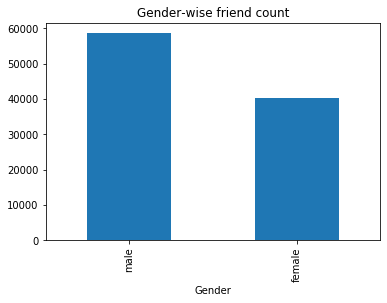

In [10]:
# Gender wise Count of People in facebook
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("Gender")
plt.title("Gender-wise friend count")
#plt.plot(facebook_df['gender'].value_counts().plot.bar())
facebook_df['gender'].value_counts().plot.bar()
plt.savefig("D:\Insaid\EDA Project\Charts\Genderwise_friendcount_pankaj.kohli@gmail.com.png")


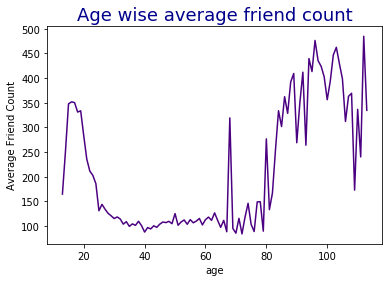

In [11]:
# Age-group wise Count of People in facebook
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
#print(facebook_df['friend_count'].describe())
#print(facebook_df['age'].describe())
#xticks = np.arange(0,facebook_df['age'].max()+1)
plt.xlabel("Age")
plt.ylabel("Average Friend Count")
plt.title("Age wise average friend count", color ="DarkBlue", size =18)
facebook_df.groupby("age").mean()["friend_count"].plot(kind ='line', color ="indigo")
plt.savefig("D:\Insaid\EDA Project\Charts\Agewise_avaergefriendcount_pankaj.kohli@gmail.com.png")

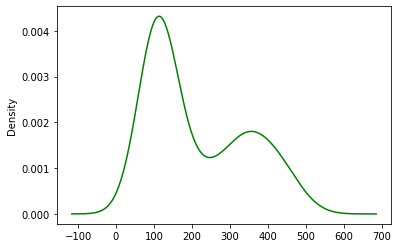

In [12]:
facebook_df.groupby("age").mean()["friend_count"].plot(kind ='kde', color ="green")
plt.savefig("D:\Insaid\EDA Project\Charts\Agewise_friendcount_pankaj.kohli@gmail.com.png")

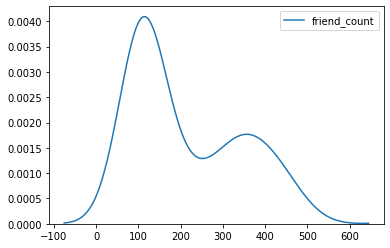

In [65]:
sns.kdeplot(data=facebook_df.groupby("age").mean()["friend_count"])

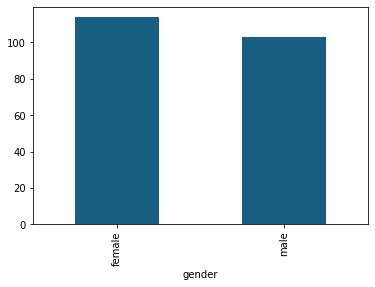

In [13]:
#Friendship initiated by Gender
facebook_df.groupby("gender").mean()["friendships_initiated"].plot.bar(color='#195e83')
plt.savefig("D:\Insaid\EDA Project\Charts\Genderwise_friendships_initiated_pankaj.kohli@gmail.com.png")

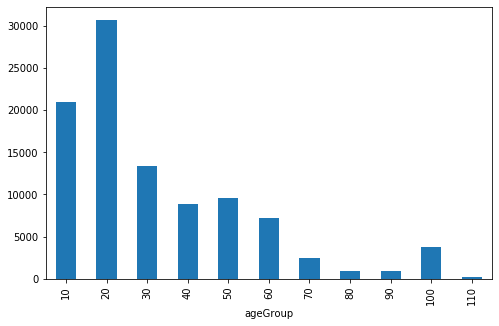

In [14]:
facebook_df["ageGroup"] = facebook_df.age.floordiv(10)*10

facebook_df.groupby(["ageGroup"]).count()["userid"].plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroupwise_userid_count_pankaj.kohli@gmail.com.png")

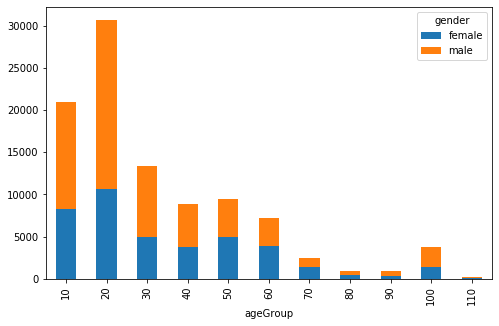

In [15]:
facebook_df.groupby(["ageGroup", "gender"]).count()["userid"].unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroup_gender_wise_userid_count_pankaj.kohli@gmail.com.png")

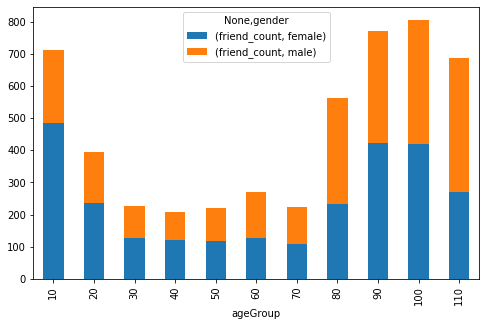

In [24]:
facebook_df.groupby(["ageGroup", "gender"]).agg({"friend_count": 'mean'})
facebook_df.groupby(["ageGroup", "gender"]).agg({"friend_count": 'mean'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroup_gender_wise_friend_count_pankaj.kohli@gmail.com.png")

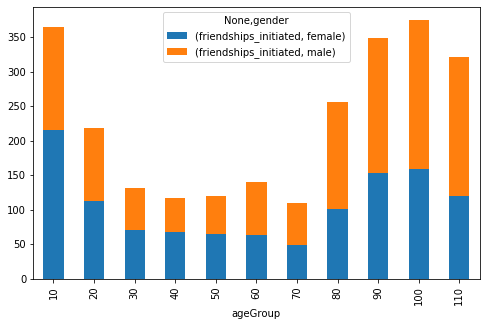

In [16]:
facebook_df.groupby(["ageGroup", "gender"]).agg({"friendships_initiated": 'mean'})
facebook_df.groupby(["ageGroup", "gender"]).agg({"friendships_initiated": 'mean'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroup_gender_wise_friendships_initiated_pankaj.kohli@gmail.com.png")

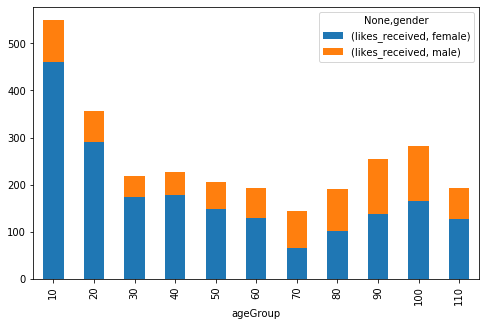

In [17]:
facebook_df.groupby(["ageGroup", "gender"]).agg({"likes_received": 'mean'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroup_gender_wise_likes_received_pankaj.kohli@gmail.com.png")

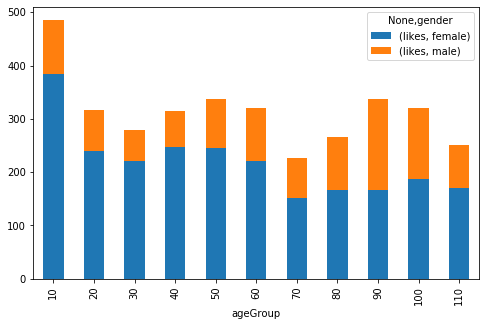

In [18]:
facebook_df.groupby(["ageGroup", "gender"]).agg({"likes": 'mean'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroup_gender_wise_likes_mean_pankaj.kohli@gmail.com.png")

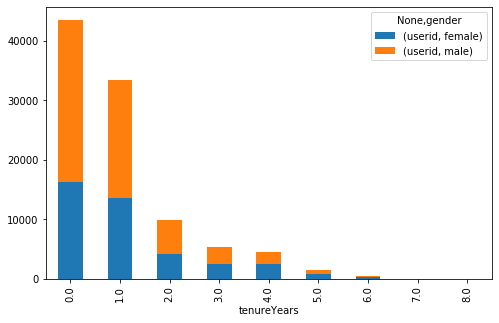

In [19]:
facebook_df["tenureYears"] = facebook_df.tenure.floordiv(365)
facebook_df.groupby(["tenureYears", "gender"]).agg({"userid": 'count'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\TenureYears_gender_wise_userid_count_pankaj.kohli@gmail.com.png")

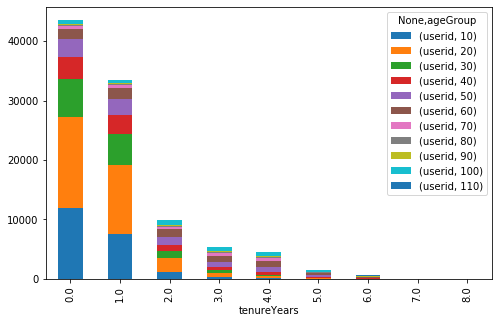

In [20]:
facebook_df.groupby(["tenureYears", "ageGroup"]).agg({"userid": 'count'}).unstack().plot.bar(stacked = True, figsize =(8,5))
plt.savefig("D:\Insaid\EDA Project\Charts\TenureYears_AgeGroupr_wise_userid_count_pankaj.kohli@gmail.com.png")

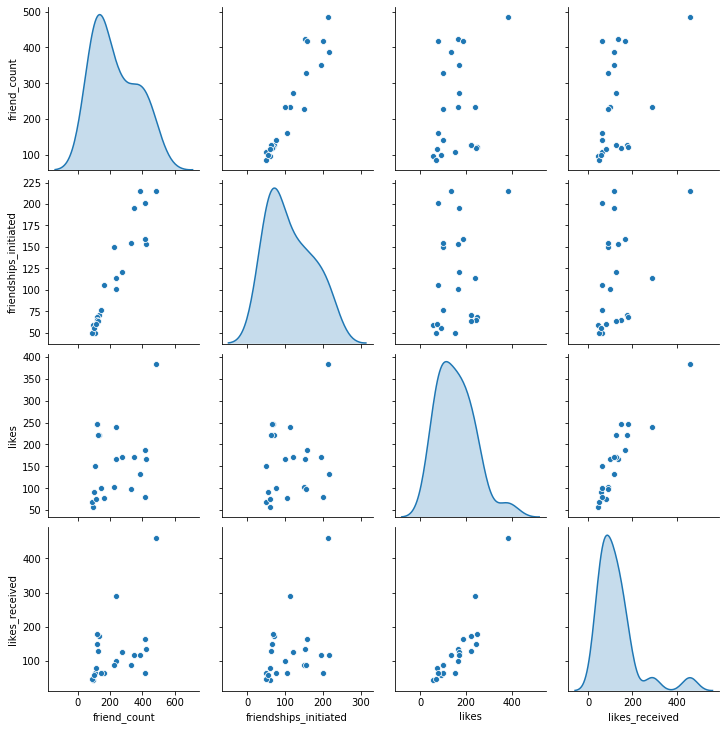

In [21]:
facebook_df.groupby(["gender", "ageGroup"]).agg({"friend_count": 'mean', "friendships_initiated": 'mean', "likes":'mean' , "likes_received":'mean'})
sns.pairplot(data = facebook_df.groupby(["gender", "ageGroup"]).agg({"friend_count": 'mean', "friendships_initiated": 'mean', "likes":'mean' , "likes_received":'mean'}), diag_kind='kde')
plt.savefig("D:\Insaid\EDA Project\Charts\Gender_AgeGroupr_wise_friend_count_friendships_initiated_pairplot_pankaj.kohli@gmail.com.png")

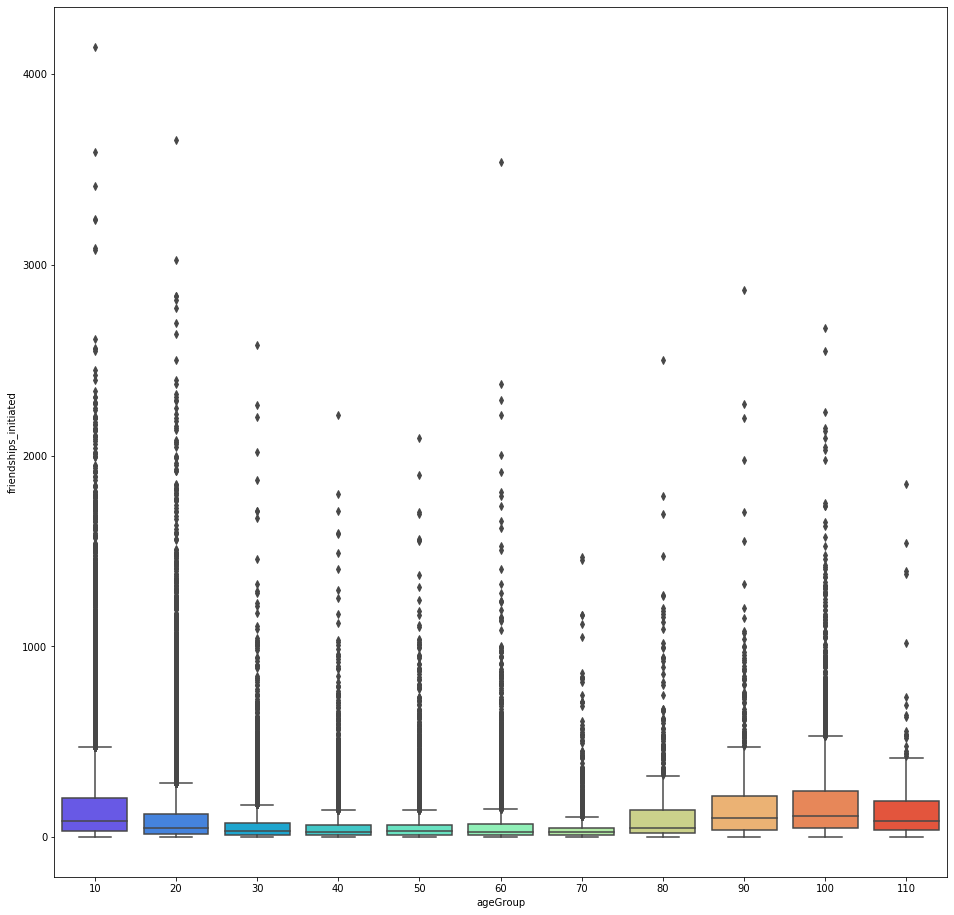

In [22]:
#facebook_df.groupby("ageGroup").mean()["friendships_initiated"]
plt.figure(figsize =(16,16))
sns.boxplot(data = facebook_df, x='ageGroup', y='friendships_initiated', palette = 'rainbow')
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroupr_wise_friendships_initiated_boxplot_pankaj.kohli@gmail.com.png")

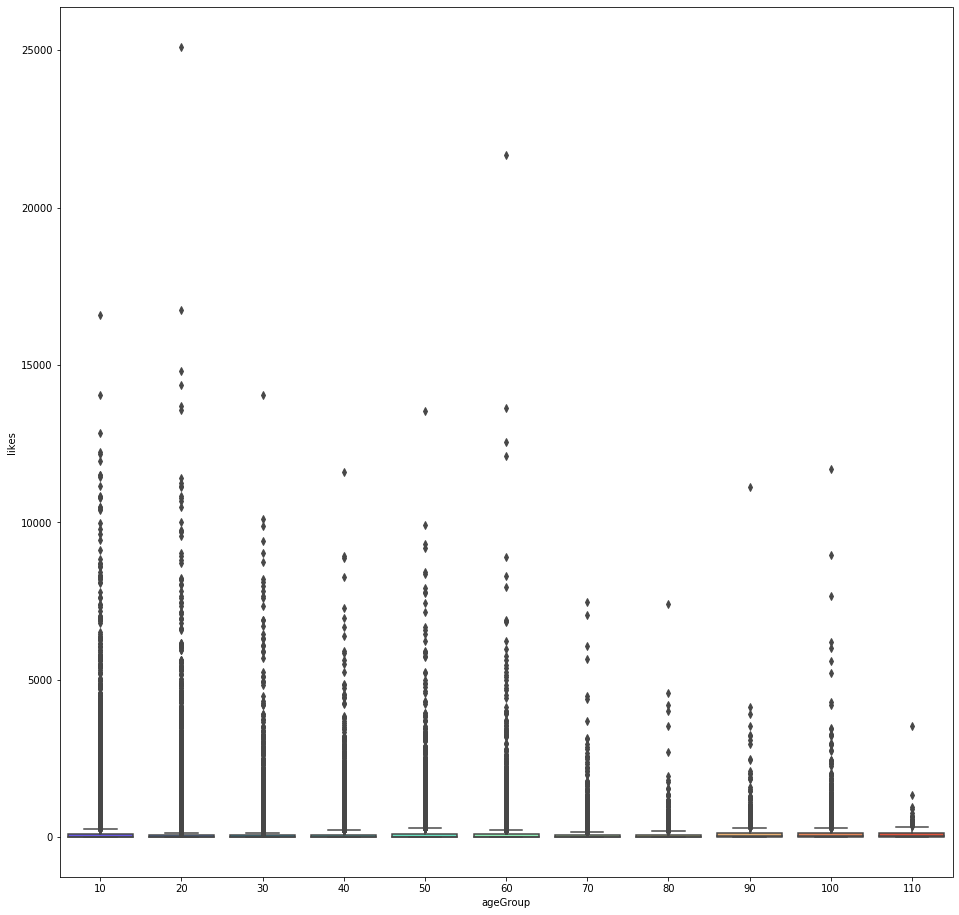

In [23]:
#facebook_df.groupby("ageGroup").mean()["friendships_initiated"]
plt.figure(figsize =(16,16))
sns.boxplot(data = facebook_df, x='ageGroup', y='likes', palette = 'rainbow')
plt.savefig("D:\Insaid\EDA Project\Charts\AgeGroupr_wise_likes_boxplot_pankaj.kohli@gmail.com.png")